In [2]:
# impoting libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [3]:
# Getting load_digits dataset shape
print("Image data shape", digits.data.shape)
print("Image data shape", digits.target.shape)


Image data shape (1797, 64)
Image data shape (1797,)


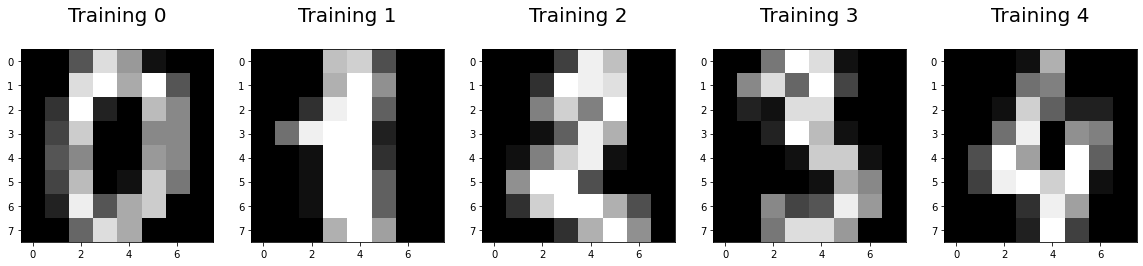

In [4]:
# Displaying some of the images and labels
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title("Training %i\n" % label, fontsize=20)

In [11]:
# Dividing dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [7]:
# shape of train data
x_train.shape

(1383, 64)

In [8]:
y_train.shape

(1383,)

In [9]:
# shape of test data
x_test.shape

(414, 64)

In [12]:
y_test.shape

(414,)

In [13]:
# import the logistic regression model
from sklearn.linear_model import LogisticRegression

In [14]:
# making an instance of the model and training it
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

C:\Users\rishi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
# predicting the output of the first element of the test set
logisticRegr.predict(x_test[0].reshape(1, -1))

array([4])

In [17]:
# Predicting the output of the first 10 element of the test set
logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [19]:
# Predicting the entire dataset
predictions = logisticRegr.predict(x_test)

In [20]:
# Determining the accruracy of the model
score = logisticRegr.score(x_test, y_test)
score

0.9516908212560387

Text(0.5, 1.0, 'Accuracy score: 0.9516908212560387')

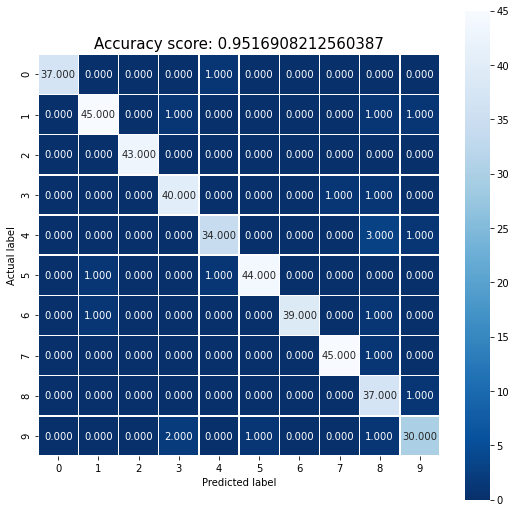

In [23]:
# Representing the confusion matrix in heat map

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy score: {0}'.format(score)
plt.title(all_sample_title, size=15)